In [1]:
%cd ~/bioinfo1/project/

/rna/hyemin/bioinfo1/project


In [3]:
!samtools view -F 3844 -b binfo1-work/CLIP-35L33G.bam > binfo1-work/CLIP-35L33G.filtered.bam
!samtools view -F 3844 -b binfo1-work/RNA-control.bam > binfo1-work/RNA-control.filtered.bam
# mapped, primary alignment, quality checked, no duplicate or supplementary reads

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

## gsnap-ab-read-counts

In [3]:
!featureCounts -a binfo1-work/gencode.gtf.gz -o binfo1-work/correlation/all-read-counts.txt CLIP/alignments/gsnap/*.filtered.bam CLIP/alignments/star/*.filtered.bam binfo1-work/CLIP-35L33G.filtered.bam binfo1-work/RNA-control.filtered.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 10 BAM files                                     ||
||                                                                            ||
||                           CLIP-2J3.filtered.bam                            ||
||                           CLIP-35L33G.filtered.bam                         ||
||                           CLIP-Polyclonal.filtered.bam        

In [4]:
dfReadcount = pd.read_csv('binfo1-work/correlation/all-read-counts.txt', sep='\t', comment='#', index_col=0)
dfReadcount.head()

,Chr,Start,End,Strand,Length,CLIP/alignments/gsnap/CLIP-2J3.filtered.bam,CLIP/alignments/gsnap/CLIP-35L33G.filtered.bam,CLIP/alignments/gsnap/CLIP-Polyclonal.filtered.bam,CLIP/alignments/gsnap/RNA-control.filtered.bam,CLIP/alignments/star/CLIP-2J3.filtered.bam,CLIP/alignments/star/CLIP-35L33G.filtered.bam,CLIP/alignments/star/CLIP-Polyclonal.filtered.bam,CLIP/alignments/star/RNA-control.filtered.bam,binfo1-work/CLIP-35L33G.filtered.bam,binfo1-work/RNA-control.filtered.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,0,2,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,0,0,1,4,1
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,0,0,0,3,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0


In [5]:
bam_columns_hyemin =dfReadcount.filter(regex='^CLIP/alignments/.*bam$', axis=1).columns
dColNameHyemin = {col : col[len('CLIP/alignments/'):] for col in bam_columns_hyemin}
dfReadcount.rename(columns = dColNameHyemin, inplace = True)
dColNameHyeshik = {'binfo1-work/CLIP-35L33G.filtered.bam' : 'CLIP-35L33G.hyeshik.bam', 'binfo1-work/RNA-control.filtered.bam' : 'RNA-control.hyeshik.bam'}
dfReadcount.rename(columns = dColNameHyeshik, inplace = True)
dfReadcount.head()

,Chr,Start,End,Strand,Length,gsnap/CLIP-2J3.filtered.bam,gsnap/CLIP-35L33G.filtered.bam,gsnap/CLIP-Polyclonal.filtered.bam,gsnap/RNA-control.filtered.bam,star/CLIP-2J3.filtered.bam,star/CLIP-35L33G.filtered.bam,star/CLIP-Polyclonal.filtered.bam,star/RNA-control.filtered.bam,CLIP-35L33G.hyeshik.bam,RNA-control.hyeshik.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,0,2,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,0,0,1,4,1
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,0,0,0,3,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0


### correlation using TPM

In [6]:
dfReadcount_TPM =dfReadcount.copy()
bam_columns = dfReadcount_TPM.filter(regex='bam$', axis=1).columns
dfReadcount_TPM[[col + '_RPK' for col in bam_columns]] = dfReadcount_TPM[bam_columns].div(dfReadcount_TPM['Length'], axis=0)
total_RPK = dfReadcount_TPM.filter(regex='_RPK$', axis=1).sum()
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,gsnap/CLIP-2J3.filtered.bam,gsnap/CLIP-35L33G.filtered.bam,gsnap/CLIP-Polyclonal.filtered.bam,gsnap/RNA-control.filtered.bam,star/CLIP-2J3.filtered.bam,...,gsnap/CLIP-2J3.filtered.bam_RPK,gsnap/CLIP-35L33G.filtered.bam_RPK,gsnap/CLIP-Polyclonal.filtered.bam_RPK,gsnap/RNA-control.filtered.bam_RPK,star/CLIP-2J3.filtered.bam_RPK,star/CLIP-35L33G.filtered.bam_RPK,star/CLIP-Polyclonal.filtered.bam_RPK,star/RNA-control.filtered.bam_RPK,CLIP-35L33G.hyeshik.bam_RPK,RNA-control.hyeshik.bam_RPK
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,...,0.001869,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,...,0.154545,0.000000,0.027273,0.000000,0.236364,0.0,0.018182,0.000000,0.000000,0.000000
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,...,0.000492,0.000328,0.001641,0.000328,0.000164,0.0,0.000000,0.000164,0.000656,0.000164
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,...,0.004167,0.000000,0.000000,0.000000,0.004167,0.0,0.000000,0.000000,0.006250,0.000000
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [7]:
RPK_bam_columns = dfReadcount_TPM.filter(regex='RPK$', axis=1).columns
dfReadcount_TPM[RPK_bam_columns] = dfReadcount_TPM[RPK_bam_columns] * 1E6 / total_RPK
dfReadcount_TPM.rename(columns={col: col[:-len('_RPK')] + '_TPM' for col in RPK_bam_columns}, inplace=True)
dfReadcount_TPM.head()

,Chr,Start,End,Strand,Length,gsnap/CLIP-2J3.filtered.bam,gsnap/CLIP-35L33G.filtered.bam,gsnap/CLIP-Polyclonal.filtered.bam,gsnap/RNA-control.filtered.bam,star/CLIP-2J3.filtered.bam,...,gsnap/CLIP-2J3.filtered.bam_TPM,gsnap/CLIP-35L33G.filtered.bam_TPM,gsnap/CLIP-Polyclonal.filtered.bam_TPM,gsnap/RNA-control.filtered.bam_TPM,star/CLIP-2J3.filtered.bam_TPM,star/CLIP-35L33G.filtered.bam_TPM,star/CLIP-Polyclonal.filtered.bam_TPM,star/RNA-control.filtered.bam_TPM,CLIP-35L33G.hyeshik.bam_TPM,RNA-control.hyeshik.bam_TPM
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,2,0,0,0,0,...,0.352615,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,17,0,3,0,26,...,29.154883,0.000000,6.409940,0.000000,49.915430,0.0,4.977985,0.000000,0.000000,0.000000
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,3,2,10,2,1,...,0.092870,0.064557,0.385676,0.090162,0.034654,0.0,0.000000,0.052162,0.130437,0.085771
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,2,0,0,0,2,...,0.786039,0.000000,0.000000,0.000000,0.879919,0.0,0.000000,0.000000,1.242002,0.000000
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [8]:
dfReadcount_TPM.filter(regex='_TPM$', axis=1).sum()

gsnap/CLIP-2J3.filtered.bam_TPM           1000000.0
gsnap/CLIP-35L33G.filtered.bam_TPM        1000000.0
gsnap/CLIP-Polyclonal.filtered.bam_TPM    1000000.0
gsnap/RNA-control.filtered.bam_TPM        1000000.0
star/CLIP-2J3.filtered.bam_TPM            1000000.0
star/CLIP-35L33G.filtered.bam_TPM         1000000.0
star/CLIP-Polyclonal.filtered.bam_TPM     1000000.0
star/RNA-control.filtered.bam_TPM         1000000.0
CLIP-35L33G.hyeshik.bam_TPM               1000000.0
RNA-control.hyeshik.bam_TPM               1000000.0
dtype: float64

In [10]:
dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='.*RNA-control.*bam$', axis=1)]]

,gsnap/RNA-control.filtered.bam,star/RNA-control.filtered.bam,RNA-control.hyeshik.bam
Geneid,,,
ENSMUSG00000102693.2,0,0,0
ENSMUSG00000064842.3,0,0,0
ENSMUSG00000051951.6,2,1,1
ENSMUSG00000102851.2,0,0,0
ENSMUSG00000103377.2,0,0,0
...,...,...,...
ENSMUSG00000064368.1,7425,7355,1976
ENSMUSG00000064369.1,62,28,61
ENSMUSG00000064370.1,14671,14609,4561


In [11]:
# dfReadcount_filter = (dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='.*RNA-control.*bam$', axis=1)]] >= 30).all(axis=1)
dfReadcount_filter = dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='.*RNA-control.*bam$', axis=1)]].mean(axis=1) >= 30
dfReadcount_filtered = dfReadcount_TPM[dfReadcount_filter].filter(regex='bam_TPM$', axis=1).copy() + 1
dfReadcount_filtered.head()

,gsnap/CLIP-2J3.filtered.bam_TPM,gsnap/CLIP-35L33G.filtered.bam_TPM,gsnap/CLIP-Polyclonal.filtered.bam_TPM,gsnap/RNA-control.filtered.bam_TPM,star/CLIP-2J3.filtered.bam_TPM,star/CLIP-35L33G.filtered.bam_TPM,star/CLIP-Polyclonal.filtered.bam_TPM,star/RNA-control.filtered.bam_TPM,CLIP-35L33G.hyeshik.bam_TPM,RNA-control.hyeshik.bam_TPM
Geneid,,,,,,,,,,
ENSMUSG00000102269.2,4.090543,4.354057,4.850393,28.004007,1.000000,1.220987,2.373065,1.318831,1.531515,13.757034
ENSMUSG00000098104.2,24.099908,22.811570,32.817138,82.296007,1.000000,4.597120,3.421265,2.513688,4.920334,23.400953
ENSMUSG00000103265.2,1.597937,6.299516,25.583287,7.095312,1.000000,1.698332,3.169486,2.511289,2.574646,89.633458
ENSMUSG00000103922.2,57.471243,54.362597,102.355797,100.455900,8.309340,6.358666,22.257718,3.973568,35.018545,47.450370
ENSMUSG00000033845.14,79.353787,97.116179,121.354100,108.274276,89.433615,109.305650,137.039699,125.086019,94.986509,84.450390


In [12]:
dfReadcount_filtered['gsnap/clip_enrichment_35L33G_TPM'] = dfReadcount_filtered['gsnap/CLIP-35L33G.filtered.bam_TPM'] / dfReadcount_filtered['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_filtered['gsnap/clip_enrichment_2J3_TPM'] = dfReadcount_filtered['gsnap/CLIP-2J3.filtered.bam_TPM'] / dfReadcount_filtered['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_filtered['gsnap/clip_enrichment_Polyclonal_TPM'] = dfReadcount_filtered['gsnap/CLIP-Polyclonal.filtered.bam_TPM'] / dfReadcount_filtered['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_filtered['star/clip_enrichment_35L33G_TPM'] = dfReadcount_filtered['star/CLIP-35L33G.filtered.bam_TPM'] / dfReadcount_filtered['star/RNA-control.filtered.bam_TPM']
dfReadcount_filtered['star/clip_enrichment_2J3_TPM'] = dfReadcount_filtered['star/CLIP-2J3.filtered.bam_TPM'] / dfReadcount_filtered['star/RNA-control.filtered.bam_TPM']
dfReadcount_filtered['star/clip_enrichment_Polyclonal_TPM'] = dfReadcount_filtered['star/CLIP-Polyclonal.filtered.bam_TPM'] / dfReadcount_filtered['star/RNA-control.filtered.bam_TPM']

dfReadcount_filtered['clip_enrichment_35L33G_hyeshik_TPM'] = dfReadcount_filtered['CLIP-35L33G.hyeshik.bam_TPM'] / dfReadcount_filtered['RNA-control.hyeshik.bam_TPM']
dfReadcount_filtered.head()

,gsnap/CLIP-2J3.filtered.bam_TPM,gsnap/CLIP-35L33G.filtered.bam_TPM,gsnap/CLIP-Polyclonal.filtered.bam_TPM,gsnap/RNA-control.filtered.bam_TPM,star/CLIP-2J3.filtered.bam_TPM,star/CLIP-35L33G.filtered.bam_TPM,star/CLIP-Polyclonal.filtered.bam_TPM,star/RNA-control.filtered.bam_TPM,CLIP-35L33G.hyeshik.bam_TPM,RNA-control.hyeshik.bam_TPM,gsnap/clip_enrichment_35L33G_TPM,gsnap/clip_enrichment_2J3_TPM,gsnap/clip_enrichment_Polyclonal_TPM,star/clip_enrichment_35L33G_TPM,star/clip_enrichment_2J3_TPM,star/clip_enrichment_Polyclonal_TPM,clip_enrichment_35L33G_hyeshik_TPM
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000102269.2,4.090543,4.354057,4.850393,28.004007,1.000000,1.220987,2.373065,1.318831,1.531515,13.757034,0.155480,0.146070,0.173204,0.925810,0.758247,1.799370,0.111326
ENSMUSG00000098104.2,24.099908,22.811570,32.817138,82.296007,1.000000,4.597120,3.421265,2.513688,4.920334,23.400953,0.277189,0.292844,0.398770,1.828835,0.397822,1.361054,0.210262
ENSMUSG00000103265.2,1.597937,6.299516,25.583287,7.095312,1.000000,1.698332,3.169486,2.511289,2.574646,89.633458,0.887842,0.225210,3.605660,0.676279,0.398202,1.262095,0.028724
ENSMUSG00000103922.2,57.471243,54.362597,102.355797,100.455900,8.309340,6.358666,22.257718,3.973568,35.018545,47.450370,0.541159,0.572104,1.018913,1.600241,2.091153,5.601444,0.738004
ENSMUSG00000033845.14,79.353787,97.116179,121.354100,108.274276,89.433615,109.305650,137.039699,125.086019,94.986509,84.450390,0.896946,0.732896,1.120803,0.873844,0.714977,1.095564,1.124761


In [13]:
dfReadcount_l2TPM = np.log2(dfReadcount_filtered.filter(regex='clip_enrichment', axis=1))

In [14]:
dfReadcount_l2TPM

,gsnap/clip_enrichment_35L33G_TPM,gsnap/clip_enrichment_2J3_TPM,gsnap/clip_enrichment_Polyclonal_TPM,star/clip_enrichment_35L33G_TPM,star/clip_enrichment_2J3_TPM,star/clip_enrichment_Polyclonal_TPM,clip_enrichment_35L33G_hyeshik_TPM
Geneid,,,,,,,
ENSMUSG00000102269.2,-2.685201,-2.775269,-2.529460,-0.111212,-0.399260,0.847492,-3.167138
ENSMUSG00000098104.2,-1.851057,-1.771795,-1.326373,0.870925,-1.329806,0.444724,-2.249739
ENSMUSG00000103265.2,-0.171625,-2.150655,1.850264,-0.564310,-1.328428,0.335821,-5.121591
ENSMUSG00000103922.2,-0.885876,-0.805650,0.027031,0.678289,1.064299,2.485799,-0.438300
ENSMUSG00000033845.14,-0.156907,-0.448320,0.164532,-0.194553,-0.484031,0.131673,0.169619
...,...,...,...,...,...,...,...
ENSMUSG00000064367.1,-2.511932,-2.664443,-2.872596,-2.558497,-2.714263,-2.862380,-1.919555
ENSMUSG00000064368.1,-2.551251,-2.627063,-3.308546,-2.640346,-2.730510,-3.337592,-1.639872
ENSMUSG00000064369.1,-1.959723,-3.831975,-4.465506,-1.725198,-4.190169,-7.022285,-0.983048


In [16]:
dfReadcount_l2TPM_hyemin = dfReadcount_l2TPM.filter(regex='/').copy()

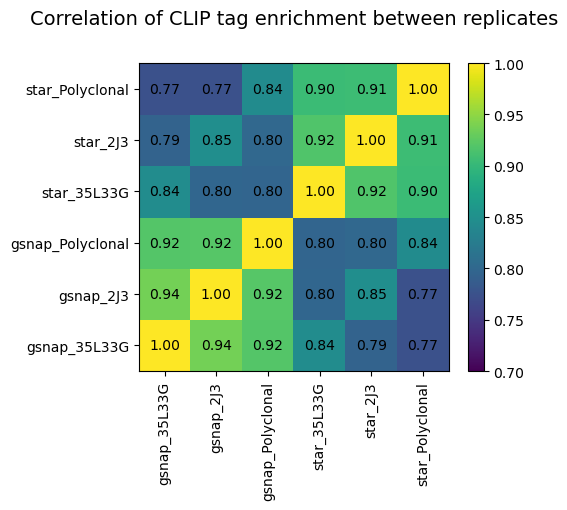

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
c = ax.pcolor(dfReadcount_l2TPM_hyemin.corr(), vmin=0.7, vmax=1)
plt.viridis()
plt.colorbar(c)

ax.set_title('Correlation of CLIP tag enrichment between replicates', fontsize=14, y=1.1)

ax.set_xticks(np.arange(dfReadcount_l2TPM_hyemin.corr().shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(dfReadcount_l2TPM_hyemin.corr().shape[0]) + 0.5, minor=False)

lLabel = [col.split('/')[0] + '_' + col.split('_')[-2] for col in dfReadcount_l2TPM_hyemin.columns]
ax.set_xticklabels(lLabel, rotation=90)
ax.set_yticklabels(lLabel)

for y in range(dfReadcount_l2TPM_hyemin.corr().shape[0]):
    for x in range(dfReadcount_l2TPM_hyemin.corr().shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % dfReadcount_l2TPM_hyemin.corr().iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

In [18]:
dfReadcount_l2TPM_hyemin.columns

Index(['gsnap/clip_enrichment_35L33G_TPM', 'gsnap/clip_enrichment_2J3_TPM',
       'gsnap/clip_enrichment_Polyclonal_TPM',
       'star/clip_enrichment_35L33G_TPM', 'star/clip_enrichment_2J3_TPM',
       'star/clip_enrichment_Polyclonal_TPM'],
      dtype='object')

Text(0.5, 0.92, 'Correlation of CLIP tag enrichment between replicates')

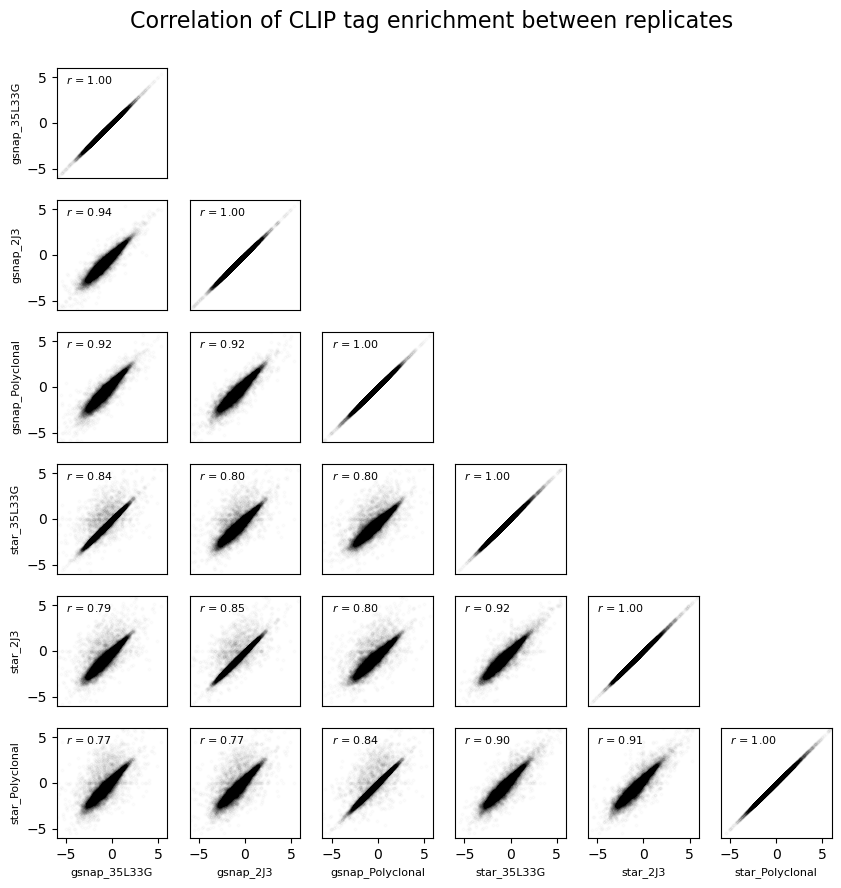

In [19]:
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
lColumns = dfReadcount_l2TPM_hyemin.columns

for i in lColumns:
    for j in lColumns:
        ax = axes.flatten()[lColumns.get_loc(i) + 6 * lColumns.get_loc(j)]
        ax.scatter(dfReadcount_l2TPM_hyemin[i], dfReadcount_l2TPM_hyemin[j], s=4, c='black', alpha=0.01)
        ax.set_xlim(-6, 6)
        ax.set_ylim(-6, 6)
        ax.set_xticks([])
        ax.set_yticks([])
        if lColumns.get_loc(j) == 5:
            ax.set_xlabel(i.split('/')[0] + '_' + i.split('_')[-2], fontsize=8)
            ax.set_xticks([-5, 0, 5])
        if lColumns.get_loc(i) == 0:
            ax.set_ylabel(j.split('/')[0] + '_' + j.split('_')[-2], fontsize=8)
            ax.set_yticks([-5, 0, 5])

        corr = stats.pearsonr(dfReadcount_l2TPM_hyemin[i], dfReadcount_l2TPM_hyemin[j])[0]
        ax.text(-5, 4, f'$r$ = {corr:.2f}', ha='left', va='bottom', fontsize=8)

# Hide the unused subplots
for i in range(len(lColumns)):
    for j in range(i):
        fig.delaxes(axes[5-i, 5-j])

fig.text(0.5, 0.92, 'Correlation of CLIP tag enrichment between replicates', fontsize=16, ha='center')

In [20]:
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

Text(0.5, 1.05, 'PCA of CLIP tag enrichment')

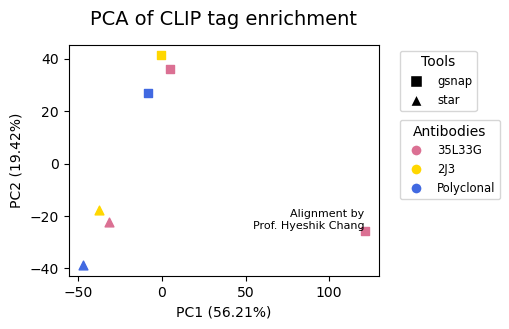

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))

pca = PCA(n_components=2)
l2pca = pca.fit_transform(dfReadcount_l2TPM.values.T)
explained_variance = pca.explained_variance_ratio_

lMarkers = ['s', '^']
lColors = ['palevioletred', 'gold', 'royalblue']
lMarkerNColor = [(marker, color) for marker in lMarkers for color in lColors]
lMarkerNColor.append(('s', 'palevioletred'))
        
for (pc1, pc2), label, (marker, color) in zip(l2pca, dfReadcount_l2TPM.columns, lMarkerNColor):
    ax.scatter(pc1, pc2, s=40, c=color, marker=marker)
    if label == 'clip_enrichment_35L33G_hyeshik_TPM':
        ax.text(pc1, pc2, 'Alignment by\nProf. Hyeshik Chang', fontsize=8, ha='right', va='bottom')

tools_legend_handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='gsnap'),
                        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='star')]

# Custom legend handles for antibodies
colors_legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='palevioletred', markersize=8, label='35L33G'),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='2J3'),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='royalblue', markersize=8, label='Polyclonal')]

# Add legends to the plot
legend1 = ax.legend(handles=tools_legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Tools')
legend2 = ax.legend(handles=colors_legend_handles, bbox_to_anchor=(1.05, 0.7), loc='upper left', fontsize='small', title='Antibodies')
ax.add_artist(legend1)

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")

ax.set_title('PCA of CLIP tag enrichment', fontsize=14, y=1.05)

Text(3.0, -5.5, '$r$ = 0.61')

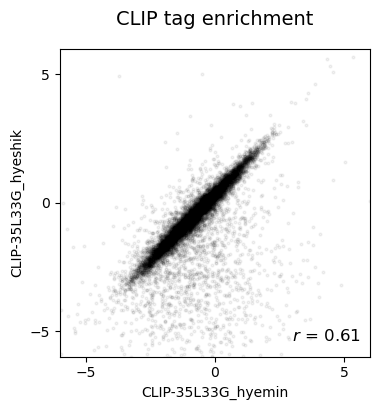

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

x = dfReadcount_l2TPM['gsnap/clip_enrichment_35L33G_TPM']
y = dfReadcount_l2TPM['clip_enrichment_35L33G_hyeshik_TPM']
ax.scatter(x, y, s=4, c='black', alpha=0.05)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xticks([-5, 0, 5])
ax.set_yticks([-5, 0, 5])

ax.set_xlabel('CLIP-35L33G_hyemin')
ax.set_ylabel('CLIP-35L33G_hyeshik')
ax.set_title('CLIP tag enrichment', fontsize=14, y=1.05)

corr = stats.pearsonr(x, y)[0]
ax.text(3.0, -5.5, f'$r$ = {corr:.2f}', ha='left', va='bottom', fontsize=12)

#### Filter : All RNA-control readcounts should be equal or more than 30

In [31]:
dfReadcount_filter_all = (dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='.*RNA-control.*bam$', axis=1)]] >= 30).all(axis=1)
# dfReadcount_filter = dfReadcount_TPM[[col for col in dfReadcount_TPM.filter(regex='.*RNA-control.*bam$', axis=1)]].mean(axis=1) >= 30
dfReadcount_filtered2 = dfReadcount_TPM[dfReadcount_filter_all].filter(regex='bam_TPM$', axis=1).copy() + 1
dfReadcount_filtered2.head()

,gsnap/CLIP-2J3.filtered.bam_TPM,gsnap/CLIP-35L33G.filtered.bam_TPM,gsnap/CLIP-Polyclonal.filtered.bam_TPM,gsnap/RNA-control.filtered.bam_TPM,star/CLIP-2J3.filtered.bam_TPM,star/CLIP-35L33G.filtered.bam_TPM,star/CLIP-Polyclonal.filtered.bam_TPM,star/RNA-control.filtered.bam_TPM,CLIP-35L33G.hyeshik.bam_TPM,RNA-control.hyeshik.bam_TPM
Geneid,,,,,,,,,,
ENSMUSG00000033845.14,79.353787,97.116179,121.354100,108.274276,89.433615,109.305650,137.039699,125.086019,94.986509,84.450390
ENSMUSG00000025903.15,51.192052,57.052141,70.177109,55.022090,53.965116,59.958533,77.599657,62.973283,57.654075,42.990683
ENSMUSG00000033813.16,26.074030,32.295550,51.169056,55.726346,25.428920,32.474800,56.810520,65.059551,110.207275,133.014896
ENSMUSG00000033793.13,24.731169,24.109776,30.541671,35.728145,28.627268,27.042765,33.924370,40.987079,23.653223,26.421151
ENSMUSG00000025907.15,21.110600,18.260278,28.150974,12.912830,23.052494,22.717398,32.646971,15.195074,21.561943,10.962756


In [32]:
dfReadcount_filtered2['gsnap/clip_enrichment_35L33G_TPM'] = dfReadcount_filtered2['gsnap/CLIP-35L33G.filtered.bam_TPM'] / dfReadcount_filtered2['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_filtered2['gsnap/clip_enrichment_2J3_TPM'] = dfReadcount_filtered2['gsnap/CLIP-2J3.filtered.bam_TPM'] / dfReadcount_filtered2['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_filtered2['gsnap/clip_enrichment_Polyclonal_TPM'] = dfReadcount_filtered2['gsnap/CLIP-Polyclonal.filtered.bam_TPM'] / dfReadcount_filtered2['gsnap/RNA-control.filtered.bam_TPM']
dfReadcount_filtered2['star/clip_enrichment_35L33G_TPM'] = dfReadcount_filtered2['star/CLIP-35L33G.filtered.bam_TPM'] / dfReadcount_filtered2['star/RNA-control.filtered.bam_TPM']
dfReadcount_filtered2['star/clip_enrichment_2J3_TPM'] = dfReadcount_filtered2['star/CLIP-2J3.filtered.bam_TPM'] / dfReadcount_filtered2['star/RNA-control.filtered.bam_TPM']
dfReadcount_filtered2['star/clip_enrichment_Polyclonal_TPM'] = dfReadcount_filtered2['star/CLIP-Polyclonal.filtered.bam_TPM'] / dfReadcount_filtered2['star/RNA-control.filtered.bam_TPM']

dfReadcount_filtered2['clip_enrichment_35L33G_hyeshik_TPM'] = dfReadcount_filtered2['CLIP-35L33G.hyeshik.bam_TPM'] / dfReadcount_filtered2['RNA-control.hyeshik.bam_TPM']
dfReadcount_filtered2.head()

,gsnap/CLIP-2J3.filtered.bam_TPM,gsnap/CLIP-35L33G.filtered.bam_TPM,gsnap/CLIP-Polyclonal.filtered.bam_TPM,gsnap/RNA-control.filtered.bam_TPM,star/CLIP-2J3.filtered.bam_TPM,star/CLIP-35L33G.filtered.bam_TPM,star/CLIP-Polyclonal.filtered.bam_TPM,star/RNA-control.filtered.bam_TPM,CLIP-35L33G.hyeshik.bam_TPM,RNA-control.hyeshik.bam_TPM,gsnap/clip_enrichment_35L33G_TPM,gsnap/clip_enrichment_2J3_TPM,gsnap/clip_enrichment_Polyclonal_TPM,star/clip_enrichment_35L33G_TPM,star/clip_enrichment_2J3_TPM,star/clip_enrichment_Polyclonal_TPM,clip_enrichment_35L33G_hyeshik_TPM
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,79.353787,97.116179,121.354100,108.274276,89.433615,109.305650,137.039699,125.086019,94.986509,84.450390,0.896946,0.732896,1.120803,0.873844,0.714977,1.095564,1.124761
ENSMUSG00000025903.15,51.192052,57.052141,70.177109,55.022090,53.965116,59.958533,77.599657,62.973283,57.654075,42.990683,1.036895,0.930391,1.275435,0.952127,0.856953,1.232263,1.341083
ENSMUSG00000033813.16,26.074030,32.295550,51.169056,55.726346,25.428920,32.474800,56.810520,65.059551,110.207275,133.014896,0.579538,0.467894,0.918220,0.499155,0.390856,0.873208,0.828533
ENSMUSG00000033793.13,24.731169,24.109776,30.541671,35.728145,28.627268,27.042765,33.924370,40.987079,23.653223,26.421151,0.674812,0.692204,0.854835,0.659788,0.698446,0.827684,0.895238
ENSMUSG00000025907.15,21.110600,18.260278,28.150974,12.912830,23.052494,22.717398,32.646971,15.195074,21.561943,10.962756,1.414119,1.634855,2.180078,1.495050,1.517103,2.148523,1.966836


In [33]:
dfReadcount_l2TPM2 = np.log2(dfReadcount_filtered2.filter(regex='clip_enrichment', axis=1))

In [34]:
dfReadcount_l2TPM2_hyemin = dfReadcount_l2TPM2.filter(regex='/').copy()

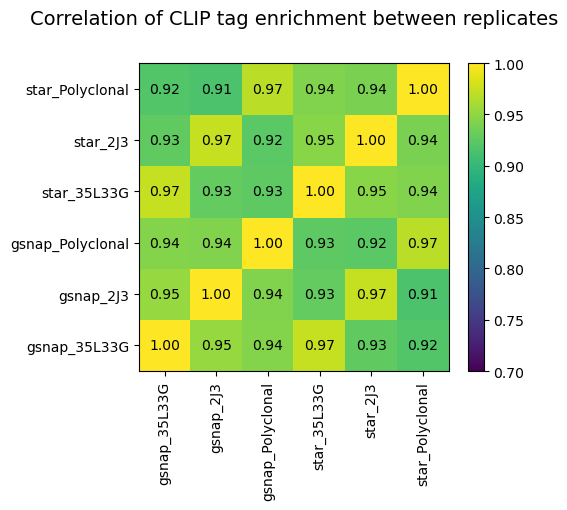

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
c = ax.pcolor(dfReadcount_l2TPM2_hyemin.corr(), vmin=0.7, vmax=1)
plt.viridis()
plt.colorbar(c)

ax.set_title('Correlation of CLIP tag enrichment between replicates', fontsize=14, y=1.1)

ax.set_xticks(np.arange(dfReadcount_l2TPM2_hyemin.corr().shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(dfReadcount_l2TPM2_hyemin.corr().shape[0]) + 0.5, minor=False)

lLabel = [col.split('/')[0] + '_' + col.split('_')[-2] for col in dfReadcount_l2TPM2_hyemin.columns]
ax.set_xticklabels(lLabel, rotation=90)
ax.set_yticklabels(lLabel)

for y in range(dfReadcount_l2TPM2_hyemin.corr().shape[0]):
    for x in range(dfReadcount_l2TPM2_hyemin.corr().shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % dfReadcount_l2TPM2_hyemin.corr().iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

Text(0.5, 0.92, 'Correlation of CLIP tag enrichment between replicates')

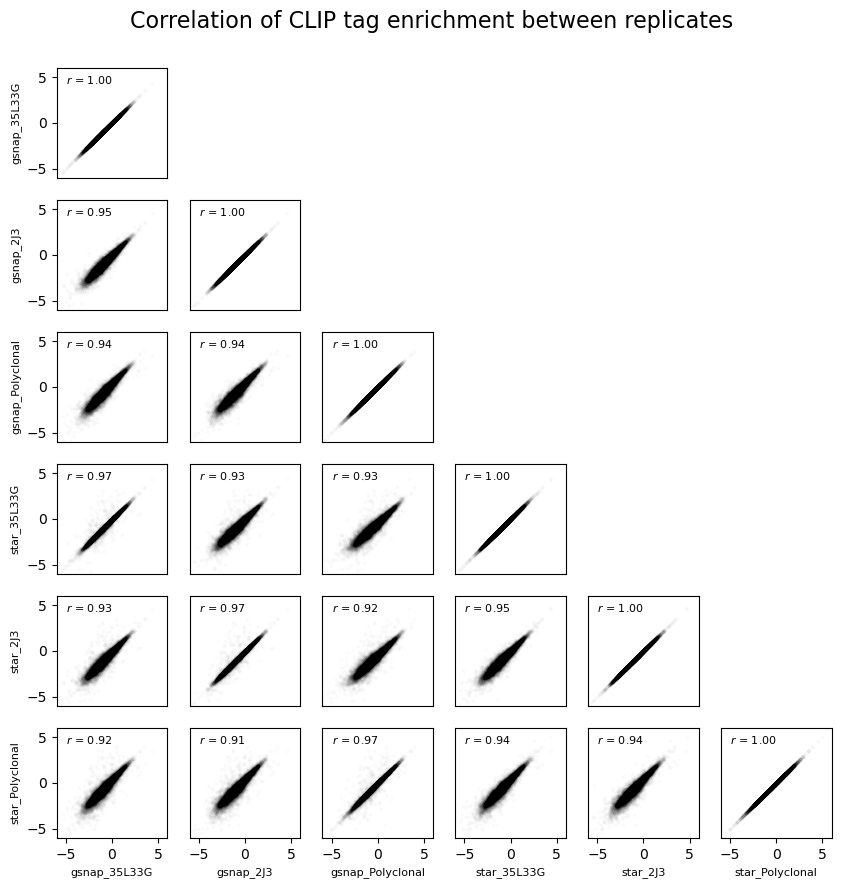

In [36]:
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
lColumns = dfReadcount_l2TPM2_hyemin.columns

for i in lColumns:
    for j in lColumns:
        ax = axes.flatten()[lColumns.get_loc(i) + 6 * lColumns.get_loc(j)]
        ax.scatter(dfReadcount_l2TPM2_hyemin[i], dfReadcount_l2TPM2_hyemin[j], s=4, c='black', alpha=0.01)
        ax.set_xlim(-6, 6)
        ax.set_ylim(-6, 6)
        ax.set_xticks([])
        ax.set_yticks([])
        if lColumns.get_loc(j) == 5:
            ax.set_xlabel(i.split('/')[0] + '_' + i.split('_')[-2], fontsize=8)
            ax.set_xticks([-5, 0, 5])
        if lColumns.get_loc(i) == 0:
            ax.set_ylabel(j.split('/')[0] + '_' + j.split('_')[-2], fontsize=8)
            ax.set_yticks([-5, 0, 5])

        corr = stats.pearsonr(dfReadcount_l2TPM2_hyemin[i], dfReadcount_l2TPM2_hyemin[j])[0]
        ax.text(-5, 4, f'$r$ = {corr:.2f}', ha='left', va='bottom', fontsize=8)

# Hide the unused subplots
for i in range(len(lColumns)):
    for j in range(i):
        fig.delaxes(axes[5-i, 5-j])

fig.text(0.5, 0.92, 'Correlation of CLIP tag enrichment between replicates', fontsize=16, ha='center')

Text(0.5, 1.05, 'PCA of CLIP tag enrichment')

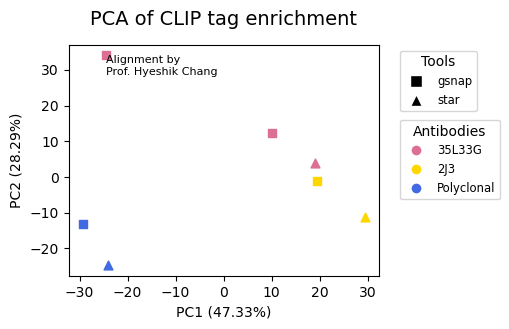

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))

pca = PCA(n_components=2)
l2pca = pca.fit_transform(dfReadcount_l2TPM2.values.T)
explained_variance = pca.explained_variance_ratio_

lMarkers = ['s', '^']
lColors = ['palevioletred', 'gold', 'royalblue']
lMarkerNColor = [(marker, color) for marker in lMarkers for color in lColors]
lMarkerNColor.append(('s', 'palevioletred'))
        
for (pc1, pc2), label, (marker, color) in zip(l2pca, dfReadcount_l2TPM2.columns, lMarkerNColor):
    ax.scatter(pc1, pc2, s=40, c=color, marker=marker)
    if label == 'clip_enrichment_35L33G_hyeshik_TPM':
        ax.text(pc1, pc2, 'Alignment by\nProf. Hyeshik Chang', fontsize=8, ha='left', va='top')

tools_legend_handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='gsnap'),
                        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='star')]

# Custom legend handles for antibodies
colors_legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='palevioletred', markersize=8, label='35L33G'),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=8, label='2J3'),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='royalblue', markersize=8, label='Polyclonal')]

# Add legends to the plot
legend1 = ax.legend(handles=tools_legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Tools')
legend2 = ax.legend(handles=colors_legend_handles, bbox_to_anchor=(1.05, 0.7), loc='upper left', fontsize='small', title='Antibodies')
ax.add_artist(legend1)

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")

ax.set_title('PCA of CLIP tag enrichment', fontsize=14, y=1.05)

Text(3.0, -5.5, '$r$ = 0.94')

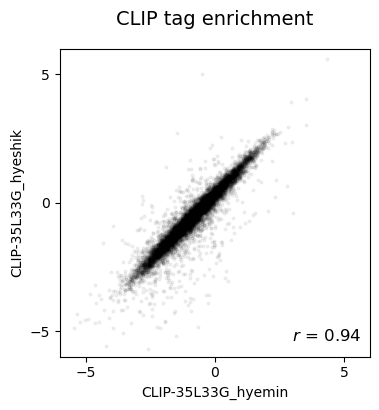

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

x = dfReadcount_l2TPM2['gsnap/clip_enrichment_35L33G_TPM']
y = dfReadcount_l2TPM2['clip_enrichment_35L33G_hyeshik_TPM']
ax.scatter(x, y, s=4, c='black', alpha=0.05)

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xticks([-5, 0, 5])
ax.set_yticks([-5, 0, 5])

ax.set_xlabel('CLIP-35L33G_hyemin')
ax.set_ylabel('CLIP-35L33G_hyeshik')
ax.set_title('CLIP tag enrichment', fontsize=14, y=1.05)

corr = stats.pearsonr(x, y)[0]
ax.text(3.0, -5.5, f'$r$ = {corr:.2f}', ha='left', va='bottom', fontsize=12)